In [3]:
pip install pandas numpy seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       20 non-null     int64 
 1   Gender           20 non-null     object
 2   SeniorCitizen    20 non-null     int64 
 3   Contract         20 non-null     object
 4   PaymentMethod    20 non-null     object
 5   InternetService  20 non-null     object
 6   State            20 non-null     object
 7   Churn            20 non-null     object
dtypes: int64(2), object(6)
memory usage: 1.4+ KB
None

Sample Data:
   CustomerID  Gender  SeniorCitizen        Contract  PaymentMethod  \
0           1    Male              0  Month-to-month    Credit card   
1           2  Female              0        Two year    Credit card   
2           3    Male              1        One year    Credit card   
3           4  Female              1        Two year  Bank transfer   
4    

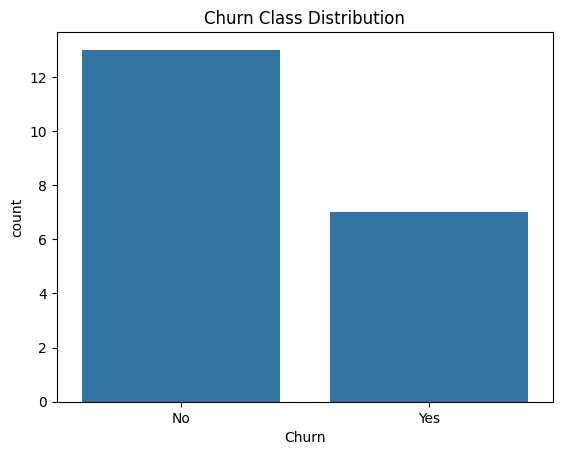


### Analyzing Bias in Gender ###
Churn         No       Yes
Gender                    
Female  0.615385  0.384615
Male    0.714286  0.285714


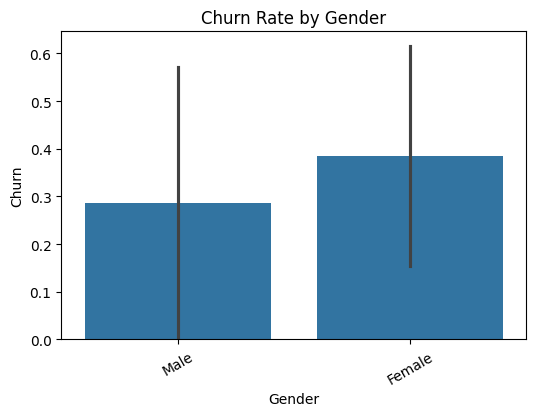


### Analyzing Bias in SeniorCitizen ###
Churn           No  Yes
SeniorCitizen          
0              0.6  0.4
1              0.7  0.3


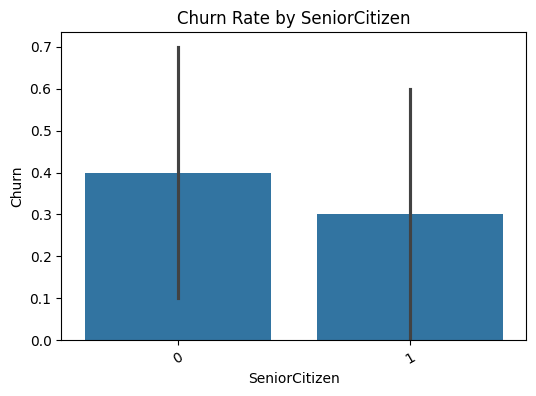


### Analyzing Bias in Contract ###
Churn                 No       Yes
Contract                          
Month-to-month  0.600000  0.400000
One year        0.666667  0.333333
Two year        0.666667  0.333333


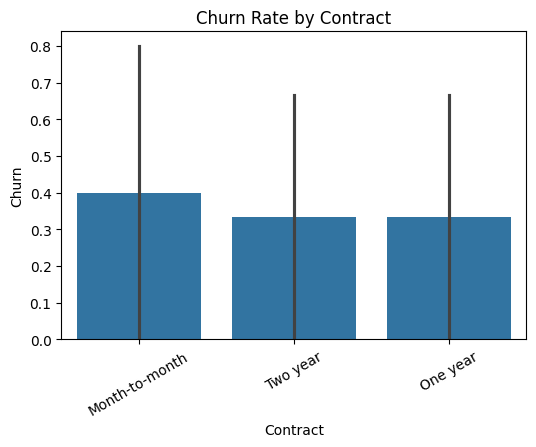


### Analyzing Bias in PaymentMethod ###
Churn               No   Yes
PaymentMethod               
Bank transfer     0.40  0.60
Credit card       0.75  0.25
Electronic check  0.80  0.20
Mailed check      0.50  0.50


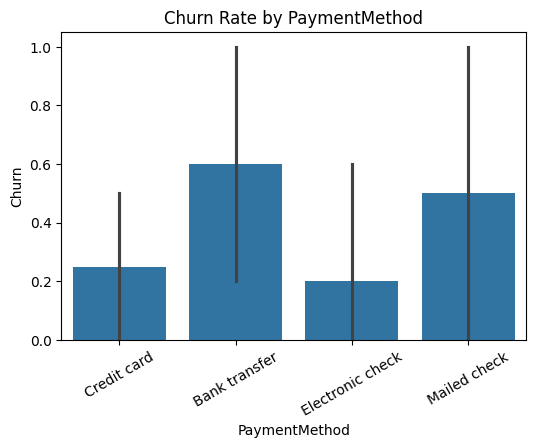


### Analyzing Bias in InternetService ###
Churn                  No       Yes
InternetService                    
DSL              0.857143  0.142857
Fiber optic      0.500000  0.500000
No               0.600000  0.400000


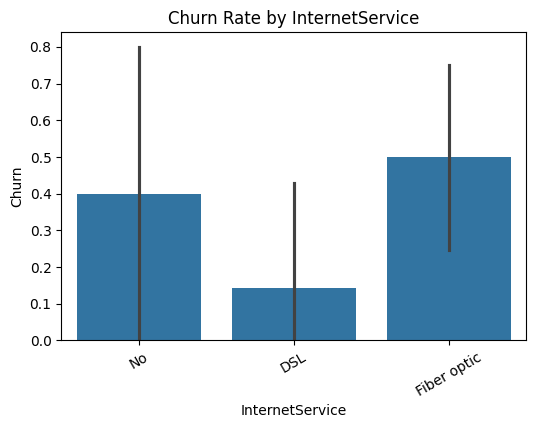


### Analyzing Bias in State ###
Churn          No    Yes
State                   
California  0.500  0.500
Florida     0.600  0.400
New York    0.800  0.200
Texas       0.625  0.375


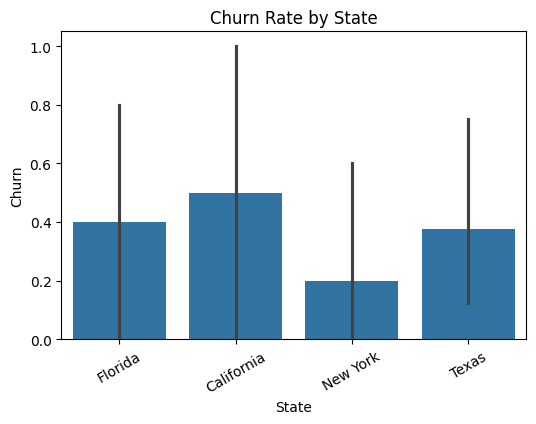


Missing Values per Column:
Series([], dtype: int64)


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a sample dataset
data = {
    "CustomerID": range(1, 21),
    "Gender": np.random.choice(["Male", "Female"], size=20),
    "SeniorCitizen": np.random.choice([0, 1], size=20),  # 0 = Not senior, 1 = Senior
    "Contract": np.random.choice(["Month-to-month", "One year", "Two year"], size=20),
    "PaymentMethod": np.random.choice(["Electronic check", "Mailed check", "Bank transfer", "Credit card"], size=20),
    "InternetService": np.random.choice(["DSL", "Fiber optic", "No"], size=20),
    "State": np.random.choice(["California", "Texas", "New York", "Florida"], size=20),
    "Churn": np.random.choice(["Yes", "No"], size=20, p=[0.3, 0.7])  # Imbalanced churn
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display basic dataset info
print("\nDataset Overview:")
print(df.info())

# Show first few rows
print("\nSample Data:")
print(df.head())

# Check class imbalance in target variable
print("\nChurn Distribution:")
print(df["Churn"].value_counts(normalize=True))

# Plot churn distribution
sns.countplot(data=df, x="Churn")
plt.title("Churn Class Distribution")
plt.show()

# Function to detect imbalance in categorical features
def detect_bias(column):
    print(f"\n### Analyzing Bias in {column} ###")
    churn_counts = df.groupby(column)["Churn"].value_counts(normalize=True).unstack()
    print(churn_counts)

    # Plot churn rate by category
    plt.figure(figsize=(6, 4))
    sns.barplot(x=column, y=df["Churn"].apply(lambda x: 1 if x == "Yes" else 0), data=df)
    plt.title(f"Churn Rate by {column}")
    plt.xticks(rotation=30)
    plt.show()

# List of columns to check for bias
bias_columns = ["Gender", "SeniorCitizen", "Contract", "PaymentMethod", "InternetService", "State"]

# Analyze bias in each column
for col in bias_columns:
    if col in df.columns:
        detect_bias(col)

# Missing values analysis
missing_values = df.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values[missing_values>0])